<h2><b>Import the libraries</b></h2>

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use('ggplot')

In [2]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


<h2><b>Read the data </b></h2>

In [3]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_9cf008190b8346b68219c51175d93784 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='EJ5syoN0wbMSMq6sjN8YaqMUwHzqAkdAcAZb1OIr2VlQ',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_9cf008190b8346b68219c51175d93784.get_object(Bucket='datascience-donotdelete-pr-fhndrvbwcdnpan',Key='Collisions.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
pd.set_option('display.max_columns',None)
df = pd.read_csv(body)
df.head()


,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.288688,47.532714,1,29800,29800,1177964,Unmatched,Block,NaN,BEACON ER AVE S BETWEEN S PORTLAND ST AND S CH...,NaN,NaN,0,Unknown,NaN,0,0,0,0,0,0,0,2004/11/10 00:00:00+00,11/10/2004,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,NaN,NaN,NaN,NaN,NaN,4315006.0,NaN,NaN,NaN,0,0,N
1,NaN,NaN,2,115700,115700,10097005,Unmatched,NaN,NaN,NaN,NEI,"Not Enough Information, or Insufficient Locati...",0,Unknown,NaN,0,0,0,0,0,0,0,2010/04/07 00:00:00+00,4/7/2010,NaN,0.0,NOT ENOUGH INFORMATION / NOT APPLICABLE,NaN,NaN,NaN,NaN,NaN,NaN,10097005.0,NaN,NaN,NaN,0,0,N
2,-122.355556,47.727318,3,1358,1358,3568600,Matched,Block,NaN,GREENWOOD AVE N BETWEEN N 134TH ST AND N 136TH ST,,NaN,1,Property Damage Only Collision,Left Turn,2,0,0,2,0,0,0,2013/04/02 00:00:00+00,4/2/2013 3:10:00 PM,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Dry,Daylight,NaN,NaN,NaN,28,From opposite direction - one left turn - one ...,0,0,N
3,-122.317563,47.618764,4,70700,70700,2806057,Matched,Block,NaN,E DENNY WAY BETWEEN 11TH AVE AND 12TH AVE,NaN,NaN,1,Property Damage Only Collision,Parked Car,2,0,0,2,0,0,0,2007/03/06 00:00:00+00,3/6/2007,Mid-Block (not related to intersection),13.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Clear,Dry,Other,NaN,7065007.0,NaN,32,One parked--one moving,0,0,N
4,-122.361015,47.538551,5,53600,53600,2127310,Matched,Block,NaN,DELRIDGE WAY SW BETWEEN SW MYRTLE ST AND SW OR...,NaN,NaN,1,Property Damage Only Collision,Rear Ended,2,0,0,2,0,0,0,2006/05/17 00:00:00+00,5/17/2006 4:56:00 PM,Mid-Block (but intersection related),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Y,0,Clear,Dry,Daylight,NaN,6137017.0,NaN,14,From same direction - both going straight - on...,0,0,N


In [4]:
df.shape

(221144, 40)

In [5]:
df['LOCATION']=df['LOCATION'].str.upper()

In [6]:

loc_count=df['LOCATION'].value_counts()
print(loc_count)
accident_counts=loc_count>5
print(accident_counts)
accidents_to_keep=list(np.array(loc_count.index.values)[np.array(accident_counts)])

BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N                          298
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N                                296
BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB                          291
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST                                          282
6TH AVE AND JAMES ST                                                                    276
AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST                                          270
RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLELLAN ST                                   257
ALASKAN WY VI NB BETWEEN S ROYAL BROUGHAM WAY ON RP AND SENECA ST OFF RP                256
ALASKAN WY VI SB BETWEEN COLUMBIA ST ON RP AND ALASKAN WY VI SB EFR OFF RP              230
WEST SEATTLE BR EB BETWEEN ALASKAN WY VI NB ON RP AND DELRIDGE-W SEATTLE BR EB ON RP    225
AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N                                      

In [7]:
rows_before=df.shape[0]
print("Rows before removing {} ".format(rows_before))
df=df.loc[df['LOCATION'].isin(accidents_to_keep)]
rows_after=df.shape[0]
print("Rows of processed dataframe {} ".format(rows_after))
print("{} rows removed!".format(rows_before-rows_after))

Rows before removing 221144 
Rows of processed dataframe 180518 
40626 rows removed!


<h2><b>Check the missing data </b></h2>

In [8]:
missing_data=df.isnull()
missing_data

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,False,False,False,False,False,False,False,False,True,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False,True,True,True,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False
7,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False
9,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False
11,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False
13,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False


In [9]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

X
False    177909
True       2609
Name: X, dtype: int64

Y
False    177909
True       2609
Name: Y, dtype: int64

OBJECTID
False    180518
Name: OBJECTID, dtype: int64

INCKEY
False    180518
Name: INCKEY, dtype: int64

COLDETKEY
False    180518
Name: COLDETKEY, dtype: int64

REPORTNO
False    180518
Name: REPORTNO, dtype: int64

STATUS
False    180518
Name: STATUS, dtype: int64

ADDRTYPE
False    180518
Name: ADDRTYPE, dtype: int64

INTKEY
True     119689
False     60829
Name: INTKEY, dtype: int64

LOCATION
False    180518
Name: LOCATION, dtype: int64

EXCEPTRSNCODE
True     99818
False    80700
Name: EXCEPTRSNCODE, dtype: int64

EXCEPTRSNDESC
True     174659
False      5859
Name: EXCEPTRSNDESC, dtype: int64

SEVERITYCODE
False    180518
Name: SEVERITYCODE, dtype: int64

SEVERITYDESC
False    180518
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    161320
True      19198
Name: COLLISIONTYPE, dtype: int64

PERSONCOUNT
False    180518
Name: PERSONCOUNT, dtype: int64

PEDCOUNT
Fal

<b>*******This is date trail only**********</b>

In [10]:
df['INCDATE'].head()

0    2004/11/10 00:00:00+00
2    2013/04/02 00:00:00+00
3    2007/03/06 00:00:00+00
4    2006/05/17 00:00:00+00
5    2013/03/30 00:00:00+00
Name: INCDATE, dtype: object

In [11]:
#df['INCDATE_parsed']=pd.to_datetime(df['INCDATE'],format=("%m/%d/%y"))

<b><h4>Dropping the Redundant columns INCDATE, EXCEPTRSNDESC</h4></b>

In [12]:
df.drop("INCDATE",axis=1,inplace=True)

In [13]:
df.drop("EXCEPTRSNDESC",axis=1,inplace=True)

<b><h4>Dropping the columns INJURIES, SERIOUSINJURIES, FATALITIES as they are not necessary for analysis</h4></b>

In [14]:
df.drop(["INJURIES","SERIOUSINJURIES","FATALITIES"],axis=1,inplace=True)

In [15]:
df.shape

(180518, 35)

In [16]:
df.drop(['OBJECTID','INCKEY','COLDETKEY','STATUS','INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'SEVERITYDESC', 'PEDCYLCOUNT', 'INCDTTM','SDOT_COLCODE','SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL','PEDROWNOTGRNT', 'SDOTCOLNUM','ST_COLCODE','ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],axis=1,inplace=True)

In [17]:
df.columns

Index(['X', 'Y', 'REPORTNO', 'ADDRTYPE', 'SEVERITYCODE', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE', 'WEATHER',
       'ROADCOND', 'LIGHTCOND', 'SPEEDING'],
      dtype='object')

In [18]:
df.head()

,X,Y,REPORTNO,ADDRTYPE,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,-122.288688,47.532714,1177964,Block,0,NaN,0,0,0,Mid-Block (not related to intersection),NaN,NaN,NaN,NaN
2,-122.355556,47.727318,3568600,Block,1,Left Turn,2,0,2,Mid-Block (not related to intersection),Overcast,Dry,Daylight,NaN
3,-122.317563,47.618764,2806057,Block,1,Parked Car,2,0,2,Mid-Block (not related to intersection),Clear,Dry,Other,NaN
4,-122.361015,47.538551,2127310,Block,1,Rear Ended,2,0,2,Mid-Block (but intersection related),Clear,Dry,Daylight,NaN
5,-122.386772,47.564720,3553269,Intersection,2,Angles,4,0,2,At Intersection (intersection related),Clear,Dry,Daylight,NaN


<h2><b> 
    
DATA WRANGLING
    
1. Dropping the missing values of columns X, Y</b></h2>

In [19]:
df.dropna(subset=["X"],axis=0,inplace=True)
df.dropna(subset=["Y"],axis=0,inplace=True)
df.reset_index(drop=True, inplace=True)

In [20]:
df.columns

Index(['X', 'Y', 'REPORTNO', 'ADDRTYPE', 'SEVERITYCODE', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE', 'WEATHER',
       'ROADCOND', 'LIGHTCOND', 'SPEEDING'],
      dtype='object')

<b><h2>5.Replacing Collission Type</h2></b>

In [21]:
df['COLLISIONTYPE'].value_counts()

Parked Car    32729
Rear Ended    31512
Angles        29640
Other         18245
Sideswipe     17168
Left Turn     13180
Pedestrian     6854
Cycles         5009
Right Turn     2735
Head On        1826
Name: COLLISIONTYPE, dtype: int64

In [22]:
df['COLLISIONTYPE'].replace(np.nan,'Other',inplace=True)

<b><h2>6.Replacing JUNCTIONTYPE</h2></b>

In [23]:
df['JUNCTIONTYPE'].value_counts()


Mid-Block (not related to intersection)              80191
At Intersection (intersection related)               58499
Mid-Block (but intersection related)                 21213
Driveway Junction                                     9969
At Intersection (but not related to intersection)     1957
Ramp Junction                                          138
Unknown                                                 15
Name: JUNCTIONTYPE, dtype: int64

In [24]:
df['JUNCTIONTYPE'].replace(np.nan,'Not classified',inplace=True)

In [25]:
df['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              80191
At Intersection (intersection related)               58499
Mid-Block (but intersection related)                 21213
Driveway Junction                                     9969
Not classified                                        5927
At Intersection (but not related to intersection)     1957
Ramp Junction                                          138
Unknown                                                 15
Name: JUNCTIONTYPE, dtype: int64

<b><h2>9. Dropping missing values of WEATHER</h2></b>

In [26]:
df['WEATHER'].value_counts()
df.dropna(subset=["WEATHER"],axis=0,inplace=True)
df.reset_index(drop=True, inplace=True)

In [27]:
df['WEATHER'].value_counts()

Clear                       94801
Raining                     28631
Overcast                    23639
Unknown                      9809
Snowing                       677
Other                         586
Fog/Smog/Smoke                449
Sleet/Hail/Freezing Rain       91
Blowing Sand/Dirt              37
Severe Crosswind               21
Partly Cloudy                   6
Blowing Snow                    1
Name: WEATHER, dtype: int64

<b><h2>10.Dropping missing values of ROADCOND</h2></b>

In [28]:
df['ROADCOND'].value_counts()

Dry               106294
Wet                40746
Unknown             9812
Ice                  879
Snow/Slush           711
Other                 97
Standing Water        92
Oil                   46
Sand/Mud/Dirt         35
Name: ROADCOND, dtype: int64

In [29]:
#df.dropna(subset=["ROADCOND"],axis=0,inplace=True)
#df.reset_index(drop=True, inplace=True)
df['ROADCOND'].replace(np.nan,'Not classified',inplace=True)
df['ROADCOND'].value_counts()

Dry               106294
Wet                40746
Unknown             9812
Ice                  879
Snow/Slush           711
Other                 97
Standing Water        92
Oil                   46
Not classified        36
Sand/Mud/Dirt         35
Name: ROADCOND, dtype: int64

<b><h2>11. Dropping missing values of LIGHTCOND </h2></b>

In [30]:
df['LIGHTCOND'].value_counts()

Daylight                    99774
Dark - Street Lights On     41111
Unknown                      8558
Dusk                         5052
Dawn                         2108
Dark - Street Lights Off      927
Dark - No Street Lights       890
Other                         150
Dark - Unknown Lighting        17
Name: LIGHTCOND, dtype: int64

In [31]:
df.dropna(subset=["LIGHTCOND"],axis=0,inplace=True)
df.reset_index(drop=True, inplace=True)

<b><h2>14. Replacing SPEEDING</h2></b>

In [32]:
df['SPEEDING'].value_counts()
df['SPEEDING'].replace(np.nan,"N",inplace=True)

In [33]:
df['SPEEDING'].value_counts()

N    151077
Y      7510
Name: SPEEDING, dtype: int64

In [34]:
df['SPEEDING'].replace('N',0,inplace=True)
df['SPEEDING'].replace('Y',1,inplace=True)
df["SPEEDING"]=df["SPEEDING"].astype("int")

<B>Check the dtype and change if required</B>

In [35]:
df.dtypes

X                float64
Y                float64
REPORTNO          object
ADDRTYPE          object
SEVERITYCODE      object
COLLISIONTYPE     object
PERSONCOUNT        int64
PEDCOUNT           int64
VEHCOUNT           int64
JUNCTIONTYPE      object
WEATHER           object
ROADCOND          object
LIGHTCOND         object
SPEEDING           int64
dtype: object

In [36]:
df['SEVERITYCODE'].replace("2b",2.5,inplace=True)

In [37]:
df['SEVERITYCODE'].replace(3,4,inplace=True)

In [38]:
df['SEVERITYCODE'].replace(2.5,3,inplace=True)

In [39]:
df[["SEVERITYCODE"]]=df[["SEVERITYCODE"]].astype("int")
df.drop("REPORTNO",axis=1,inplace=True)

In [40]:
df.columns
df.head()


,X,Y,ADDRTYPE,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,-122.355556,47.727318,Block,1,Left Turn,2,0,2,Mid-Block (not related to intersection),Overcast,Dry,Daylight,0
1,-122.317563,47.618764,Block,1,Parked Car,2,0,2,Mid-Block (not related to intersection),Clear,Dry,Other,0
2,-122.361015,47.538551,Block,1,Rear Ended,2,0,2,Mid-Block (but intersection related),Clear,Dry,Daylight,0
3,-122.386772,47.564720,Intersection,2,Angles,4,0,2,At Intersection (intersection related),Clear,Dry,Daylight,0
4,-122.356919,47.638989,Block,1,Parked Car,2,0,2,Mid-Block (not related to intersection),Clear,Dry,Daylight,0


In [41]:
X=df[['X', 'Y','SEVERITYCODE','PERSONCOUNT','VEHCOUNT','JUNCTIONTYPE','WEATHER', 'ROADCOND','LIGHTCOND', 'SPEEDING']].values
X[0:5]

array([[-122.35555594209299, 47.7273177900175, 1, 2, 2,
        'Mid-Block (not related to intersection)', 'Overcast', 'Dry',
        'Daylight', 0],
       [-122.317562617498, 47.6187637305668, 1, 2, 2,
        'Mid-Block (not related to intersection)', 'Clear', 'Dry',
        'Other', 0],
       [-122.361014916682, 47.5385507842185, 1, 2, 2,
        'Mid-Block (but intersection related)', 'Clear', 'Dry',
        'Daylight', 0],
       [-122.38677160689501, 47.5647203004631, 2, 4, 2,
        'At Intersection (intersection related)', 'Clear', 'Dry',
        'Daylight', 0],
       [-122.356919302075, 47.638989178092295, 1, 2, 2,
        'Mid-Block (not related to intersection)', 'Clear', 'Dry',
        'Daylight', 0]], dtype=object)

In [42]:
#sns.regplot(x="VEHCOUNT",y="PERSONCOUNT",data=df)
#plt.ylim(0,)

In [43]:
df[['SPEEDING','SEVERITYCODE']].corr()

,SPEEDING,SEVERITYCODE
SPEEDING,1.000000,0.057254
SEVERITYCODE,0.057254,1.000000


In [44]:
df_sub=df[['X','Y','SEVERITYCODE','PERSONCOUNT','VEHCOUNT','JUNCTIONTYPE','WEATHER','ROADCOND','LIGHTCOND','SPEEDING']]
df_sub.head(5)

,X,Y,SEVERITYCODE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,-122.355556,47.727318,1,2,2,Mid-Block (not related to intersection),Overcast,Dry,Daylight,0
1,-122.317563,47.618764,1,2,2,Mid-Block (not related to intersection),Clear,Dry,Other,0
2,-122.361015,47.538551,1,2,2,Mid-Block (but intersection related),Clear,Dry,Daylight,0
3,-122.386772,47.564720,2,4,2,At Intersection (intersection related),Clear,Dry,Daylight,0
4,-122.356919,47.638989,1,2,2,Mid-Block (not related to intersection),Clear,Dry,Daylight,0


In [45]:
df_sub['X']=df_sub['X']/df_sub['X'].max()
df_sub['Y']=df_sub['Y']/df_sub['Y'].max()
df_sub.head(5)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,X,Y,SEVERITYCODE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,1.000954,0.999857,1,2,2,Mid-Block (not related to intersection),Overcast,Dry,Daylight,0
1,1.000643,0.997583,1,2,2,Mid-Block (not related to intersection),Clear,Dry,Other,0
2,1.000999,0.995903,1,2,2,Mid-Block (but intersection related),Clear,Dry,Daylight,0
3,1.001209,0.996451,2,4,2,At Intersection (intersection related),Clear,Dry,Daylight,0
4,1.000965,0.998007,1,2,2,Mid-Block (not related to intersection),Clear,Dry,Daylight,0


In [46]:
dummy_junction=pd.get_dummies(df_sub['JUNCTIONTYPE'])
dummy_junction.rename(columns={"Unknown":"Junction Unknown"},inplace=True)
dummy_junction.head()

,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),Not classified,Ramp Junction,Junction Unknown
0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0


In [47]:
dummy_roadcond=pd.get_dummies(df_sub['ROADCOND'])
dummy_roadcond.rename(columns={"Not classified":"Road condition Not classified","Other":"Roadcond other"},inplace=True)
dummy_roadcond.head()

,Dry,Ice,Road condition Not classified,Oil,Roadcond other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Unknown,Wet
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [48]:
dummy_lightcond=pd.get_dummies(df_sub['LIGHTCOND'])
dummy_lightcond.rename(columns={"Unknown":"Light condition Unknown","Other":"Lightcond other"},inplace=True)
dummy_lightcond.head()

,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Lightcond other,Light condition Unknown
0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0


In [49]:
dummy_weather=pd.get_dummies(df_sub['WEATHER'])
dummy_weather.rename(columns={"Unknown":"Weather Unknown","Other":"Weather Other"},inplace=True)
dummy_weather.head()

,Blowing Sand/Dirt,Blowing Snow,Clear,Fog/Smog/Smoke,Weather Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Weather Unknown
0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0


In [50]:
df_sub=pd.concat([df_sub,dummy_junction,dummy_roadcond,dummy_lightcond,dummy_weather],axis=1)

In [51]:
df_sub.drop(["WEATHER","ROADCOND","LIGHTCOND",'JUNCTIONTYPE'],axis=1,inplace=True)

In [52]:
df_sub.head()

,X,Y,SEVERITYCODE,PERSONCOUNT,VEHCOUNT,SPEEDING,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),Not classified,Ramp Junction,Junction Unknown,Dry,Ice,Road condition Not classified,Oil,Roadcond other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Unknown,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Lightcond other,Light condition Unknown,Blowing Sand/Dirt,Blowing Snow,Clear,Fog/Smog/Smoke,Weather Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Weather Unknown
0,1.000954,0.999857,1,2,2,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1.000643,0.997583,1,2,2,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1.000999,0.995903,1,2,2,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1.001209,0.996451,2,4,2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,1.000965,0.998007,1,2,2,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [53]:
df_sub.columns

Index(['X', 'Y', 'SEVERITYCODE', 'PERSONCOUNT', 'VEHCOUNT', 'SPEEDING',
       'At Intersection (but not related to intersection)',
       'At Intersection (intersection related)', 'Driveway Junction',
       'Mid-Block (but intersection related)',
       'Mid-Block (not related to intersection)', 'Not classified',
       'Ramp Junction', 'Junction Unknown', 'Dry', 'Ice',
       'Road condition Not classified', 'Oil', 'Roadcond other',
       'Sand/Mud/Dirt', 'Snow/Slush', 'Standing Water', 'Unknown', 'Wet',
       'Dark - No Street Lights', 'Dark - Street Lights Off',
       'Dark - Street Lights On', 'Dark - Unknown Lighting', 'Dawn',
       'Daylight', 'Dusk', 'Lightcond other', 'Light condition Unknown',
       'Blowing Sand/Dirt', 'Blowing Snow', 'Clear', 'Fog/Smog/Smoke',
       'Weather Other', 'Overcast', 'Partly Cloudy', 'Raining',
       'Severe Crosswind', 'Sleet/Hail/Freezing Rain', 'Snowing',
       'Weather Unknown'],
      dtype='object')

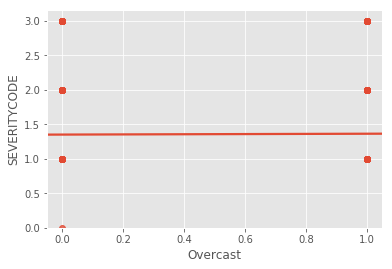

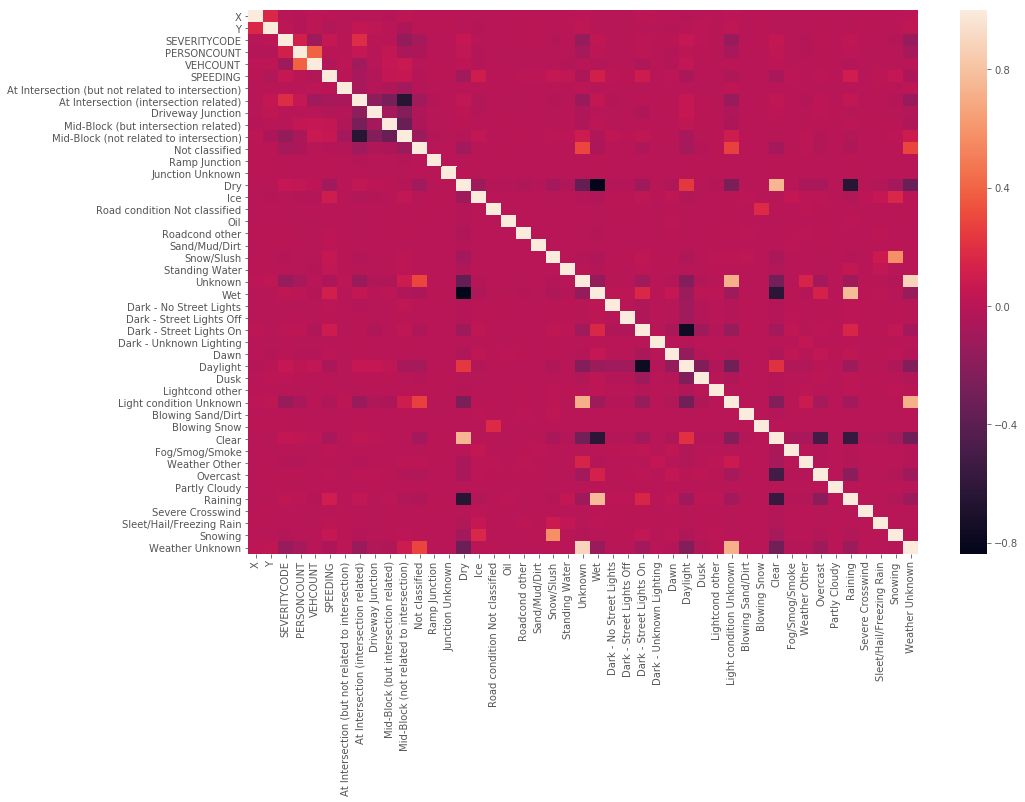

In [54]:
sns.regplot(x='Overcast',y="SEVERITYCODE",data=df_sub)
plt.ylim(0,)
plt.figure(figsize = (15,10))
sns.heatmap(df_sub.corr())

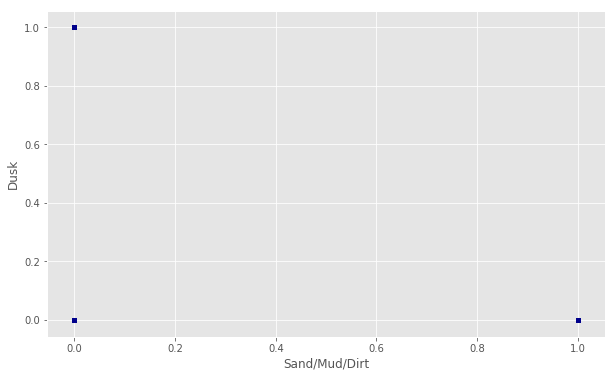

In [55]:
df_sub.plot(kind='scatter', x="Sand/Mud/Dirt",y="Dusk", figsize=(10, 6),color='darkblue')

<b><h2>EXPLORATORY DATA ANALYSIS </b></h2>

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Speeding and severity of accident has positive linear relation

(0, 5.866750896033987)

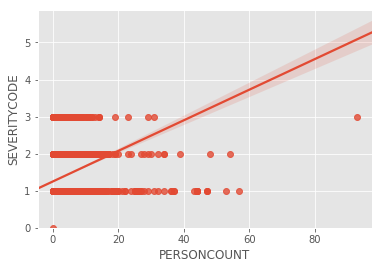

In [57]:
sns.regplot(x="PERSONCOUNT",y="SEVERITYCODE",data=df)
plt.ylim(0,)

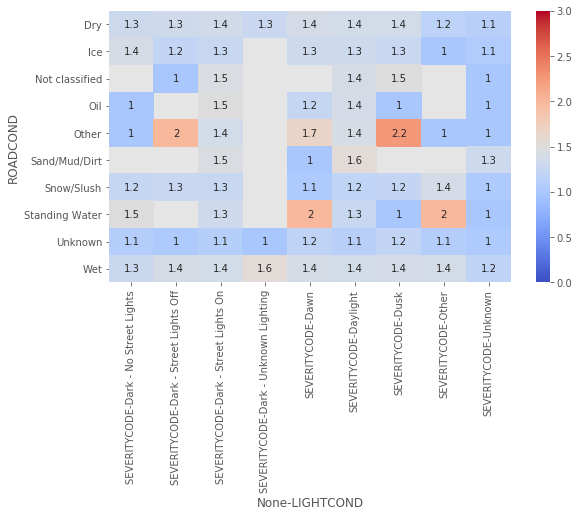

In [58]:
df_x=df[['ROADCOND','LIGHTCOND','SEVERITYCODE']]
df_xg=df_x.groupby(['ROADCOND','LIGHTCOND'],as_index=False).mean()
#df_grp
df_xp=df_xg.pivot(index="ROADCOND",columns="LIGHTCOND")
df_xp
plt.figure(figsize=(9,5))
sns.heatmap(df_xp,vmin=0,vmax=3,cmap="coolwarm",annot=True)

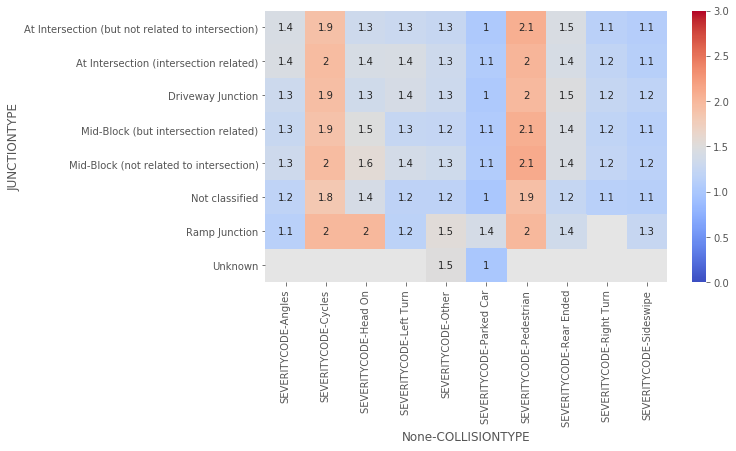

In [59]:
df_x=df[['JUNCTIONTYPE','COLLISIONTYPE','SEVERITYCODE']]
df_xg=df_x.groupby(['JUNCTIONTYPE','COLLISIONTYPE'],as_index=False).mean()
#df_grp
df_xp=df_xg.pivot(index="JUNCTIONTYPE",columns="COLLISIONTYPE")
df_xp
plt.figure(figsize=(9,5))
sns.heatmap(df_xp,vmin=0,vmax=3,cmap="coolwarm",annot=True)

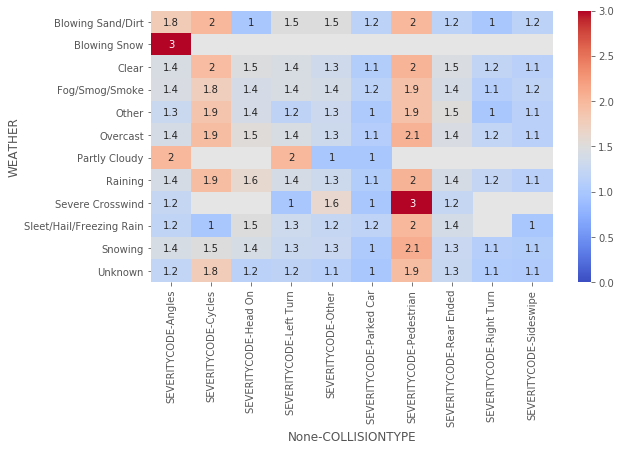

In [60]:
df_weathercolli=df[['WEATHER','COLLISIONTYPE','SEVERITYCODE']]
df_weathercolligrp=df_weathercolli.groupby(['WEATHER','COLLISIONTYPE'],as_index=False).mean()
#df_grp
df_weathercollipivot=df_weathercolligrp.pivot(index="WEATHER",columns="COLLISIONTYPE")
df_weathercollipivot
plt.figure(figsize=(9,5))
sns.heatmap(df_weathercollipivot,vmin=0,vmax=3,cmap="coolwarm",annot=True)

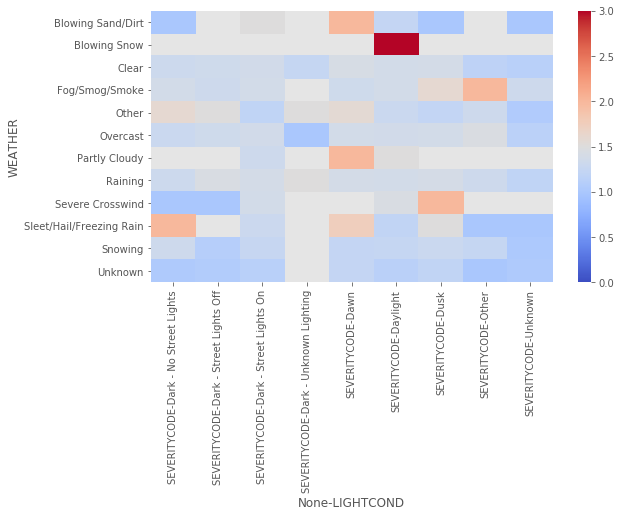

In [61]:
df_weatherlight=df[['WEATHER','LIGHTCOND','SEVERITYCODE']]
df_grp=df_weatherlight.groupby(['WEATHER','LIGHTCOND'],as_index=False).mean()
#df_grp
df_pivot=df_grp.pivot(index="WEATHER",columns="LIGHTCOND")
df_pivot
plt.figure(figsize=(9,5))
sns.heatmap(df_pivot,vmin=0,vmax=3,cmap="coolwarm")
#plt.pcolor(df_pivot,cmap="RdBu")
#plt.colorbar()
#plt.xticks(rotation=90)
#plt.show()

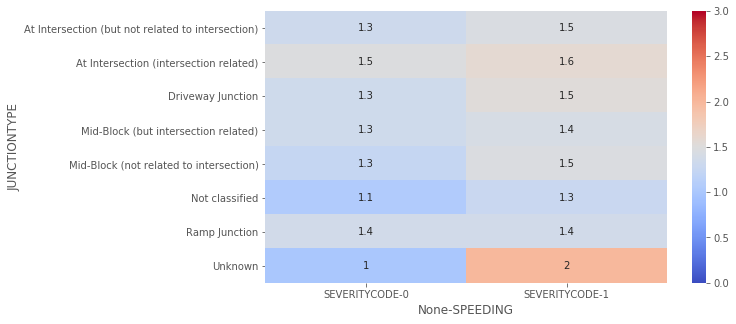

In [62]:
df_junctionspeed=df[['JUNCTIONTYPE','SPEEDING','SEVERITYCODE']]
df_junctionspeedgrp=df_junctionspeed.groupby(['JUNCTIONTYPE','SPEEDING'],as_index=False).mean()
#df_junctionspeedgrp
df_js_grp_piv=df_junctionspeedgrp.pivot(index="JUNCTIONTYPE",columns="SPEEDING")
df_js_grp_piv
plt.figure(figsize=(9,5))
sns.heatmap(df_js_grp_piv,vmin=0,vmax=3,cmap="coolwarm",annot=True)

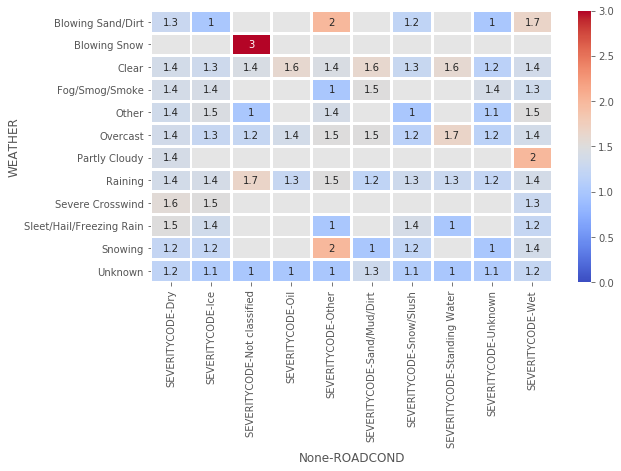

In [63]:
df_weatherroad=df[['WEATHER','ROADCOND','SEVERITYCODE']]
df_weatherroadgrp=df_weatherroad.groupby(['WEATHER','ROADCOND'],as_index=False).mean()
#df_weatherroadgrp
df_wr_grp_piv=df_weatherroadgrp.pivot(index="WEATHER",columns="ROADCOND")
df_wr_grp_piv
plt.figure(figsize=(9,5))
sns.heatmap(df_wr_grp_piv,vmin=0,vmax=3,cmap="coolwarm",annot=True,linewidth=2)

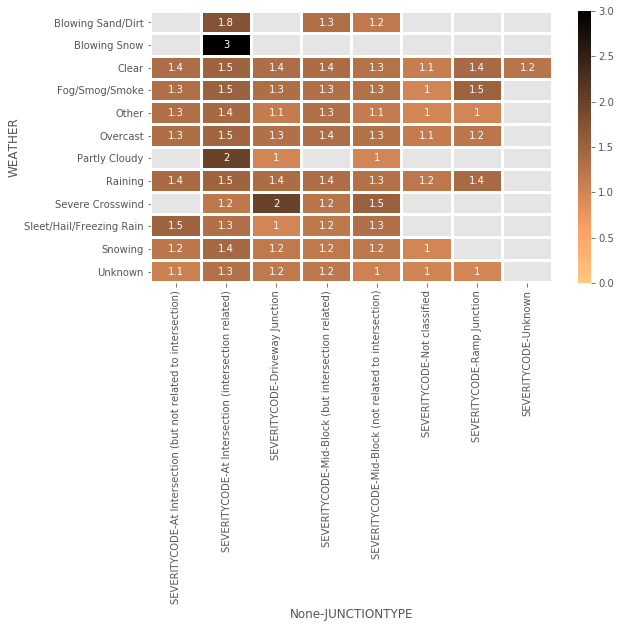

In [64]:
df_weatherjunc=df[['WEATHER','JUNCTIONTYPE','SEVERITYCODE']]
df_weatherjuncgrp=df_weatherjunc.groupby(['WEATHER','JUNCTIONTYPE'],as_index=False).mean()
#df_weatherroadgrp
df_wj_grp_piv=df_weatherjuncgrp.pivot(index="WEATHER",columns="JUNCTIONTYPE")
df_wj_grp_piv
plt.figure(figsize=(9,5))
sns.heatmap(df_wj_grp_piv,vmin=0,vmax=3,cmap="copper_r",annot=True,linewidth=2)

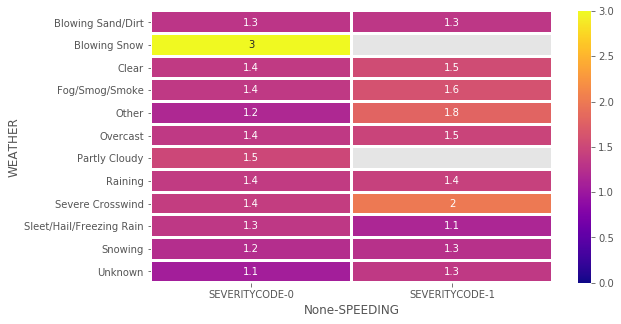

In [65]:
df_weatherspeed=df[['WEATHER','SPEEDING','SEVERITYCODE']]
df_weatherspeedgrp=df_weatherspeed.groupby(['WEATHER','SPEEDING'],as_index=False).mean()
#df_weatherspeedgrp
df_ws_grp_piv=df_weatherspeedgrp.pivot(index="WEATHER",columns="SPEEDING")
df_ws_grp_piv
plt.figure(figsize=(9,5))
sns.heatmap(df_ws_grp_piv,vmin=0,vmax=3,cmap="plasma",annot=True,linewidth=2)

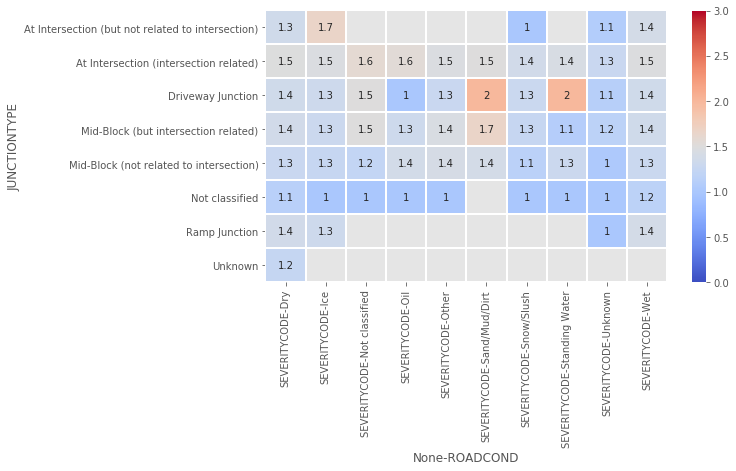

In [66]:
df_junctionroad=df[['JUNCTIONTYPE','ROADCOND','SEVERITYCODE']]
df_junctionroadgrp=df_junctionroad.groupby(['JUNCTIONTYPE','ROADCOND'],as_index=False).mean()
#df_junctionroadgrp
df_jr_grp_piv=df_junctionroadgrp.pivot(index="JUNCTIONTYPE",columns="ROADCOND")
df_jr_grp_piv
plt.figure(figsize=(9,5))
sns.heatmap(df_jr_grp_piv,vmin=0,vmax=3,cmap="coolwarm",annot=True,linewidth=1)

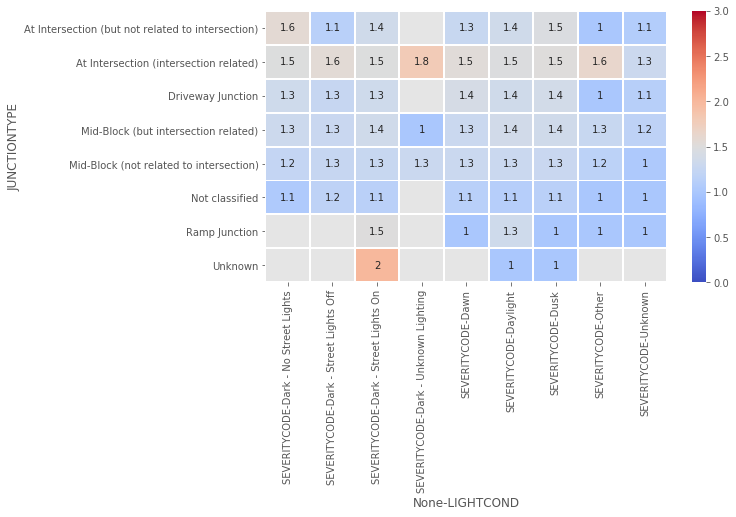

In [67]:
df_junctionlight=df[['JUNCTIONTYPE','LIGHTCOND','SEVERITYCODE']]
df_junctionlightgrp=df_junctionlight.groupby(['JUNCTIONTYPE','LIGHTCOND'],as_index=False).mean()
#df_junctionroadgrp
df_jl_grp_piv=df_junctionlightgrp.pivot(index="JUNCTIONTYPE",columns="LIGHTCOND")
df_jl_grp_piv
plt.figure(figsize=(9,5))
sns.heatmap(df_jl_grp_piv,vmin=0,vmax=3,cmap="coolwarm",annot=True,linewidth=1)

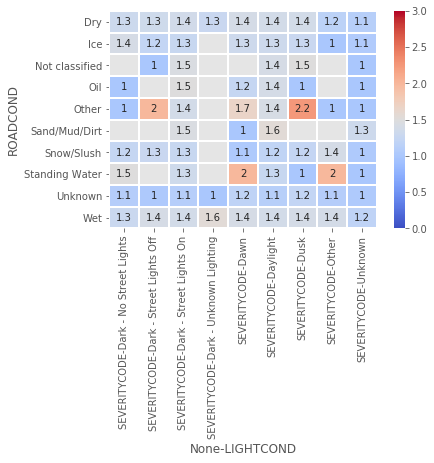

In [68]:
df_roadlight=df[['ROADCOND','LIGHTCOND','SEVERITYCODE']]
df_roadlightgrp=df_roadlight.groupby(['ROADCOND','LIGHTCOND'],as_index=False).mean()
#df_junctionroadgrp
df_rl_grp_piv=df_roadlightgrp.pivot(index="ROADCOND",columns="LIGHTCOND")
#df_rl_grp_piv
#plt.show()

sns.heatmap(df_rl_grp_piv,vmin=0,vmax=3,cmap="coolwarm",annot=True,linewidth=1)

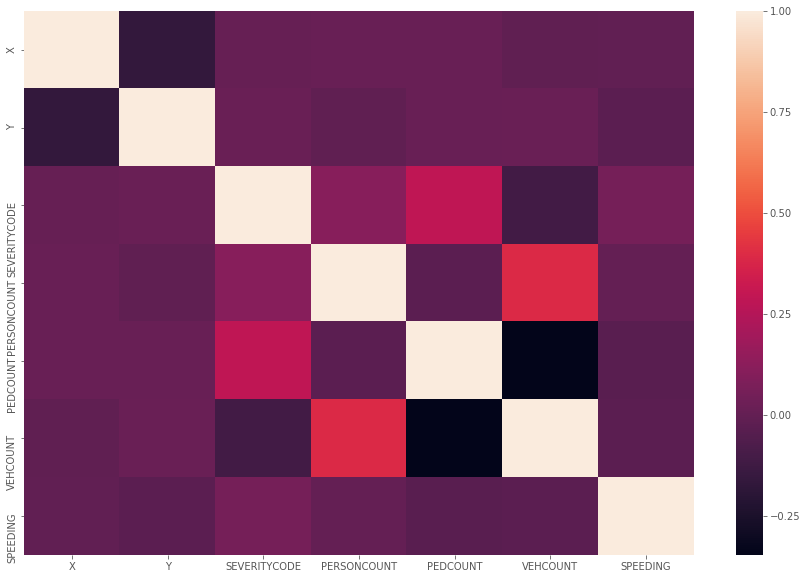

In [69]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr())

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

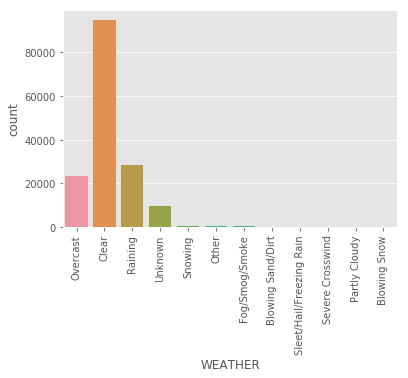

In [70]:
sns.countplot(x="WEATHER",data=df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

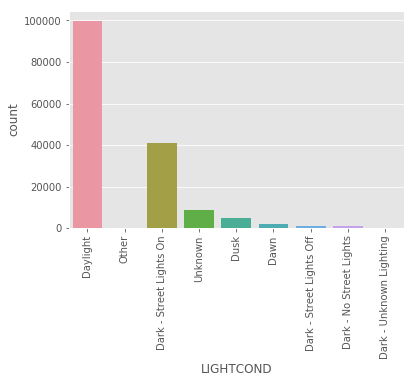

In [71]:
sns.countplot(x="LIGHTCOND",data=df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

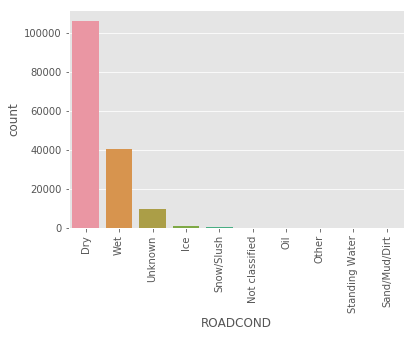

In [72]:
sns.countplot(x="ROADCOND",data=df)
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

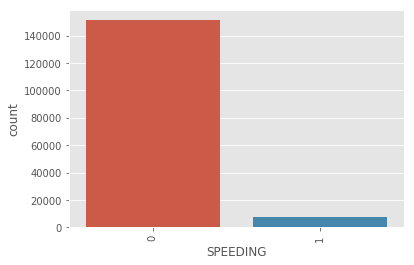

In [73]:
sns.countplot(x="SPEEDING",data=df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

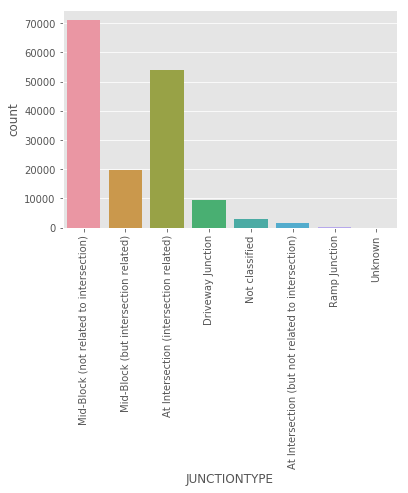

In [74]:
sns.countplot(x="JUNCTIONTYPE",data=df)
plt.xticks(rotation=90)

In [75]:
df_road=df.sort_values(["ROADCOND"],ascending=False,axis=0)
df_road['ROADCOND'].value_counts()

Dry               106184
Wet                40721
Unknown             9791
Ice                  879
Snow/Slush           708
Other                 96
Standing Water        92
Oil                   46
Sand/Mud/Dirt         35
Not classified        35
Name: ROADCOND, dtype: int64

In [76]:
df_severity=df.sort_values(["SEVERITYCODE"],ascending=False,axis=0)
df_severity

,X,Y,ADDRTYPE,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
158586,-122.329055,47.582937,Block,3,Pedestrian,2,1,1,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On,0
12962,-122.351724,47.560306,Block,3,Other,3,0,2,Driveway Junction,Clear,Dry,Daylight,0
105521,-122.333562,47.606801,Intersection,3,Pedestrian,2,1,1,At Intersection (intersection related),Clear,Dry,Daylight,0
105526,-122.355567,47.732314,Intersection,3,Pedestrian,2,1,1,At Intersection (intersection related),Raining,Wet,Daylight,0
48143,-122.328634,47.708629,Intersection,3,Left Turn,5,0,2,At Intersection (intersection related),Clear,Dry,Daylight,0
105529,-122.336266,47.654981,Block,3,Cycles,2,0,1,Mid-Block (not related to intersection),Clear,Dry,Daylight,0
81807,-122.270726,47.538907,Intersection,3,Angles,2,0,2,At Intersection (intersection related),Clear,Dry,Daylight,1
2563,-122.340892,47.612398,Intersection,3,Pedestrian,2,1,1,At Intersection (intersection related),Clear,Dry,Daylight,0
144888,-122.344522,47.690563,Intersection,3,Pedestrian,2,1,1,At Intersection (intersection related),Clear,Dry,Daylight,0
93400,-122.354876,47.615034,Intersection,3,Cycles,2,0,1,At Intersection (intersection related),Clear,Dry,Daylight,0


In [77]:
list_roadcond=['Wet','Dry','Unknown','Ice','Snow/Slush','Standing Water','Other','Oil','Sand/Mud/Dirt']

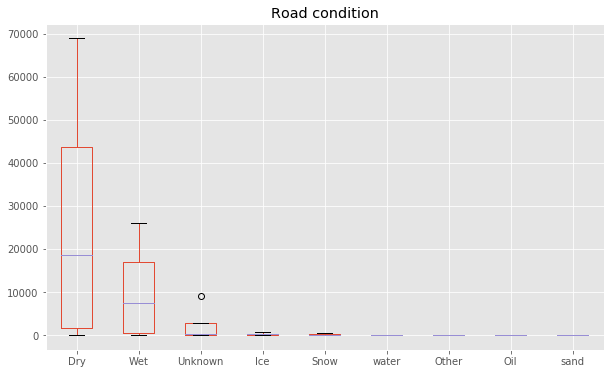

In [78]:
df_dry=df_severity[df_severity['ROADCOND']=='Dry']
df_dry_count=df_dry.groupby("SEVERITYCODE")['ROADCOND'].count()

df_wet=df_severity[df_severity['ROADCOND']=='Wet']
df_wet_count=df_wet.groupby("SEVERITYCODE")['ROADCOND'].count()

df_unk=df_severity[df_severity['ROADCOND']=='Unknown']
df_unk_count=df_unk.groupby("SEVERITYCODE")['ROADCOND'].count()

df_ice=df_severity[df_severity['ROADCOND']=='Ice']
df_ice_count=df_ice.groupby("SEVERITYCODE")['ROADCOND'].count()

df_sno=df_severity[df_severity['ROADCOND']=='Snow/Slush']
df_sno_count=df_sno.groupby("SEVERITYCODE")['ROADCOND'].count()

df_wat=df_severity[df_severity['ROADCOND']=='Standing Water']
df_wat_count=df_wat.groupby("SEVERITYCODE")['ROADCOND'].count()


df_oth=df_severity[df_severity['ROADCOND']=='Other']
df_oth_count=df_oth.groupby("SEVERITYCODE")['ROADCOND'].count()


df_oil=df_severity[df_severity['ROADCOND']=='Oil']
df_oil_count=df_oil.groupby("SEVERITYCODE")['ROADCOND'].count()


df_san=df_severity[df_severity['ROADCOND']=='Sand/Mud/Dirt']
df_san_count=df_san.groupby("SEVERITYCODE")['ROADCOND'].count()

new_df=pd.DataFrame({'Dry':df_dry_count,'Wet':df_wet_count,'Unknown':df_unk_count,'Ice':df_ice_count,'Snow':df_sno_count,'water':df_wat_count,'Other':df_oth_count,'Oil':df_oil_count,'sand':df_san_count})
new_df.replace(np.nan,0,inplace=True)
new_df.head(20)

new_df.plot(kind="box",figsize=(10,6))
plt.title("Road condition")
plt.show()

In [79]:
new_df.columns


Index(['Dry', 'Wet', 'Unknown', 'Ice', 'Snow', 'water', 'Other', 'Oil',
       'sand'],
      dtype='object')

In [80]:
new_df.head(10)

,Dry,Wet,Unknown,Ice,Snow,water,Other,Oil,sand
SEVERITYCODE,,,,,,,,,
0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,68908.0,26049,9134.0,635.0,566.0,65.0,59.0,29.0,18.0
2,35153.0,13930,632.0,228.0,135.0,25.0,34.0,17.0,17.0
3,2123.0,741,25.0,16.0,7.0,2.0,3.0,0.0,0.0


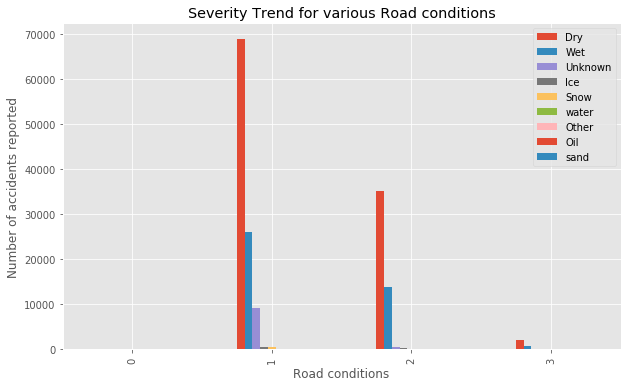

In [81]:

new_df.plot(kind="bar",figsize=(10,6))
plt.title('Severity Trend for various Road conditions')
plt.ylabel('Number of accidents reported')
plt.xlabel('Road conditions')
plt.show()

Weather analysis

In [82]:
df['WEATHER'].value_counts()

Clear                       94706
Raining                     28612
Overcast                    23623
Unknown                      9788
Snowing                       672
Other                         581
Fog/Smog/Smoke                449
Sleet/Hail/Freezing Rain       91
Blowing Sand/Dirt              37
Severe Crosswind               21
Partly Cloudy                   6
Blowing Snow                    1
Name: WEATHER, dtype: int64

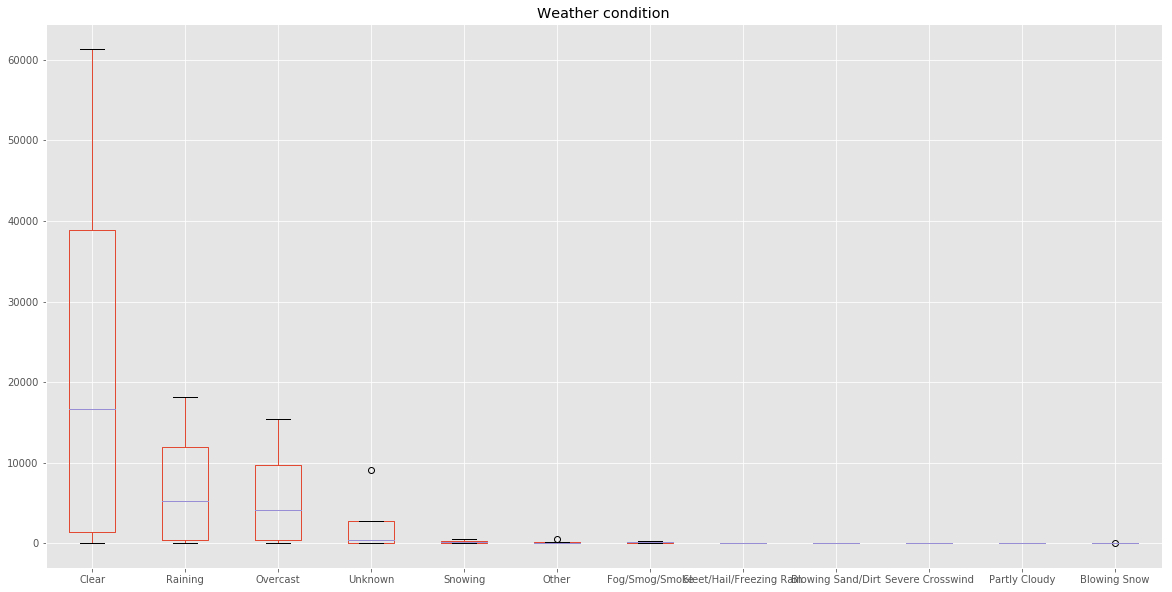

In [83]:
df_clear=df_severity[df_severity['WEATHER']=='Clear']
df_clear_count=df_clear.groupby("SEVERITYCODE")['WEATHER'].count()

df_rain=df_severity[df_severity['WEATHER']=='Raining']
df_rain_count=df_rain.groupby("SEVERITYCODE")['WEATHER'].count()

df_ovr=df_severity[df_severity['WEATHER']=='Overcast']
df_ovr_count=df_ovr.groupby("SEVERITYCODE")['WEATHER'].count()

df_unkw=df_severity[df_severity['WEATHER']=='Unknown']
df_unkw_count=df_unkw.groupby("SEVERITYCODE")['WEATHER'].count()

df_snw=df_severity[df_severity['WEATHER']=='Snowing']
df_snw_count=df_snw.groupby("SEVERITYCODE")['WEATHER'].count()

df_othw=df_severity[df_severity['WEATHER']=='Other']
df_othw_count=df_othw.groupby("SEVERITYCODE")['WEATHER'].count()

df_fog=df_severity[df_severity['WEATHER']=='Fog/Smog/Smoke']
df_fog_count=df_fog.groupby("SEVERITYCODE")['WEATHER'].count()

df_sleet=df_severity[df_severity['WEATHER']=='Sleet/Hail/Freezing Rain']
df_sleet_count=df_sleet.groupby("SEVERITYCODE")['WEATHER'].count()

df_blw=df_severity[df_severity['WEATHER']=='Blowing Sand/Dirt']
df_blw_count=df_blw.groupby("SEVERITYCODE")['WEATHER'].count()


df_sev=df_severity[df_severity['WEATHER']=='Severe Crosswind']
df_sev_count=df_sev.groupby("SEVERITYCODE")['WEATHER'].count()

df_prt=df_severity[df_severity['WEATHER']=='Partly Cloudy']
df_prt_count=df_prt.groupby("SEVERITYCODE")['WEATHER'].count()

df_blwd=df_severity[df_severity['WEATHER']=='Blowing Snow']
df_blwd_count=df_blwd.groupby("SEVERITYCODE")['WEATHER'].count()




df_weather=pd.DataFrame({'Clear':df_clear_count,'Raining':df_rain_count,'Overcast':df_ovr_count,'Unknown':df_unkw_count,'Snowing':df_snw_count,'Other':df_othw_count,'Fog/Smog/Smoke':df_fog_count,'Sleet/Hail/Freezing Rain':df_sleet_count,'Blowing Sand/Dirt':df_blw_count,'Severe Crosswind':df_sev_count,'Partly Cloudy':df_prt_count,'Blowing Snow':df_blwd_count})
df_weather.replace(np.nan,0,inplace=True)
df_weather.head(20)

df_weather.plot(kind="box",figsize=(20,10))
plt.title("Weather condition")
plt.show()

In [84]:
df_weather.head()

,Clear,Raining,Overcast,Unknown,Snowing,Other,Fog/Smog/Smoke,Sleet/Hail/Freezing Rain,Blowing Sand/Dirt,Severe Crosswind,Partly Cloudy,Blowing Snow
SEVERITYCODE,,,,,,,,,,,,
0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,61374.0,18177,15470.0,9081.0,519.0,473.0,285.0,66.0,25.0,13.0,3.0,0.0
2,31436.0,9913,7713.0,673.0,144.0,99.0,159.0,23.0,12.0,7.0,3.0,0.0
3,1896.0,521,440.0,34.0,9.0,9.0,5.0,2.0,0.0,1.0,0.0,1.0


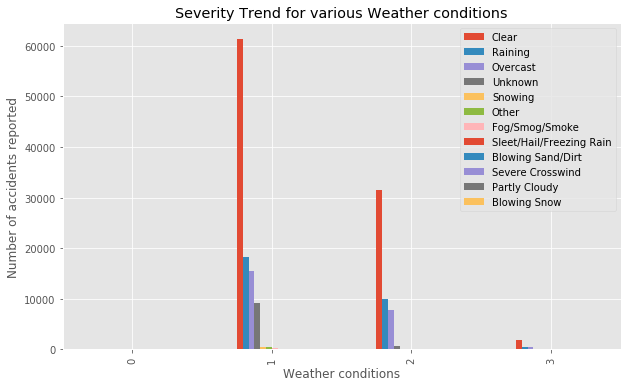

In [85]:

df_weather.plot(kind="bar",figsize=(10,6))
plt.title('Severity Trend for various Weather conditions')
plt.ylabel('Number of accidents reported')
plt.xlabel('Weather conditions')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0471ec56a0>]],
      dtype=object)

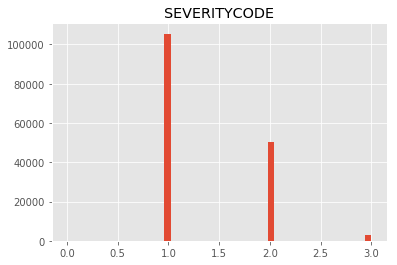

In [86]:
df.hist(column="SEVERITYCODE",bins=50)


In [87]:
list_speeding={0,1}
df_no=df_severity[df_severity['SPEEDING']==0]
df_no_count=df_no.groupby("SEVERITYCODE")['SPEEDING'].count()
df_yes=df_severity[df_severity['SPEEDING']==1]
df_yes_count=df_yes.groupby("SEVERITYCODE")['SPEEDING'].count()
new_df_speeding=pd.DataFrame({"No":df_no_count,"Yes":df_yes_count})
new_df_speeding.replace(np.nan,0,inplace=True)
new_df_speeding.head()


,No,Yes
SEVERITYCODE,,
0,1,0.0
1,101251,4235.0
2,47278,2904.0
3,2547,371.0


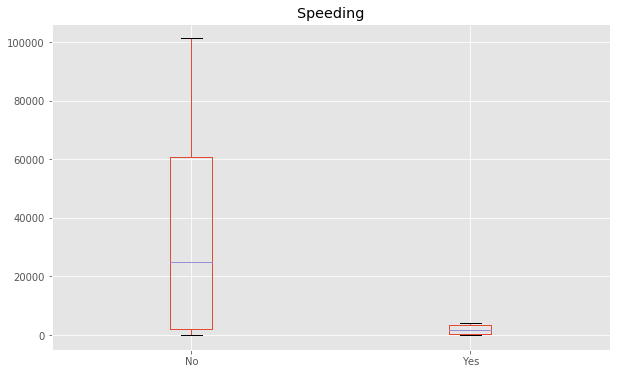

In [88]:

new_df_speeding.plot(kind="box",figsize=(10,6))
plt.title("Speeding")
plt.show()

<Figure size 432x288 with 0 Axes>

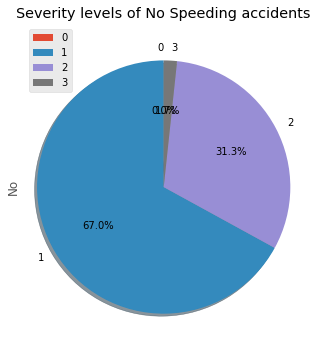

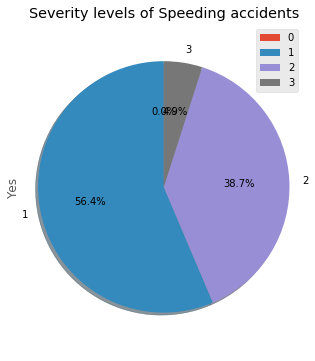

In [89]:
fig = plt.figure()
new_df_speeding.plot(kind='pie',
figsize=(5, 6),
autopct='%1.1f%%', # add in percentages
startangle=90,
shadow=True,
y="No")
plt.title('Severity levels of No Speeding accidents')
plt.axis('equal')  



new_df_speeding.plot(kind='pie',
figsize=(5, 6),
autopct='%1.1f%%', # add in percentages
startangle=90,
shadow=True,
y="Yes")
plt.title('Severity levels of Speeding accidents')
plt.axis('equal')

plt.show()



In [100]:
'''X=np.asarray(df_sub[['X', 'Y', 'PERSONCOUNT', 'VEHCOUNT', 'SPEEDING',
       'At Intersection (but not related to intersection)',
       'At Intersection (intersection related)', 'Driveway Junction',
       'Mid-Block (but intersection related)',
       'Mid-Block (not related to intersection)', 'Not classified',
       'Ramp Junction', 'Junction Unknown', 'Dry', 'Ice',
       'Road condition Not classified', 'Oil', 'Roadcond other',
       'Sand/Mud/Dirt', 'Snow/Slush', 'Standing Water', 'Unknown', 'Wet',
       'Dark - No Street Lights', 'Dark - Street Lights Off',
       'Dark - Street Lights On', 'Dark - Unknown Lighting', 'Dawn',
       'Daylight', 'Dusk', 'Lightcond other', 'Light condition Unknown',
       'Blowing Sand/Dirt', 'Blowing Snow', 'Clear', 'Fog/Smog/Smoke',
       'Weather Other', 'Overcast', 'Partly Cloudy', 'Raining',
       'Severe Crosswind', 'Sleet/Hail/Freezing Rain', 'Snowing',
       'Weather Unknown']])'''

X=np.asarray(df_sub[['SEVERITYCODE','At Intersection (but not related to intersection)',
       'At Intersection (intersection related)', 'Driveway Junction']])
X[0:5]

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [2, 0, 1, 0],
       [1, 0, 0, 0]])

In [101]:
y=np.asarray(df_sub['SEVERITYCODE'])
y[0:5]

array([1, 1, 1, 2, 1])

In [102]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.68581705, -0.10253669, -0.71768429, -0.24976291],
       [-0.68581705, -0.10253669, -0.71768429, -0.24976291],
       [-0.68581705, -0.10253669, -0.71768429, -0.24976291],
       [ 1.25576619, -0.10253669,  1.39337033, -0.24976291],
       [-0.68581705, -0.10253669, -0.71768429, -0.24976291]])

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,random_state=4)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (126869, 4) (126869,)
Test set: (31718, 4) (31718,)


In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [105]:
yhat = LR.predict(X_test)
yhat

array([1, 1, 2, ..., 1, 2, 1])

In [106]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[4.18598252e-03, 9.60663969e-01, 3.49192584e-02, 2.30789647e-04],
       [4.18598252e-03, 9.60663969e-01, 3.49192584e-02, 2.30789647e-04],
       [4.69555808e-03, 7.10682620e-03, 9.53392793e-01, 3.48048229e-02],
       ...,
       [4.18121956e-03, 9.69033295e-01, 2.65056803e-02, 2.79805369e-04],
       [4.61723669e-03, 4.90212879e-03, 9.62133029e-01, 2.83476052e-02],
       [4.18121956e-03, 9.69033295e-01, 2.65056803e-02, 2.79805369e-04]])

In [107]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.9804527397692162

In [108]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     20991
           2       0.94      1.00      0.97     10107
           3       0.00      0.00      0.00       620

   micro avg       0.98      0.98      0.98     31718
   macro avg       0.65      0.67      0.66     31718
weighted avg       0.96      0.98      0.97     31718



/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
